In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pygeos
import momepy
from libpysal.weights import Queen
from tqdm import tqdm

In [2]:
gdf = gpd.read_parquet("../../urbangrammar_samba/sp_sig_concept/barcelona/data.pq")

In [10]:
gdf

uID                                       tessellation   eID  \
0      32004.0  POLYGON ((432134.537 4581026.154, 432114.514 4...     0   
1      32005.0  POLYGON ((432143.300 4581011.416, 432142.423 4...     0   
2      32006.0  POLYGON ((432119.125 4581004.320, 432141.346 4...     0   
3      32007.0  POLYGON ((432148.249 4581003.971, 432148.271 4...     0   
4      32008.0  POLYGON ((432148.624 4580987.010, 432147.673 4...     0   
...        ...                                                ...   ...   
82370  56448.0  POLYGON ((427288.332 4577151.951, 427302.223 4...  5852   
82371      NaN  POLYGON ((427407.654 4577101.819, 427405.996 4...  5853   
82372      NaN  POLYGON ((427194.177 4576961.126, 427213.001 4...  5854   
82373      NaN  POLYGON ((427480.333 4577076.215, 427501.055 4...  5855   
82374      NaN  POLYGON ((426836.909 4583807.381, 426836.623 4...  5857   

                                               buildings    tID     stcOri  \
0      POLYGON ((432150.502 4581030.798, 432148.781 4...      0  15.895018   
1      POLYGON ((432141.079 4581028.136, 432143.721 4...      1  15.959191   
2      POLYGON ((432148.111 4581012.778, 432148.341 4...      2  16.159193   
3      POLYGON ((432159.642 4581004.302, 432160.339 4...      3  15.822243   
4      POLYGON ((432155.041 4580997.493, 432155.961 4...      4  15.764376   
...                                                  ...    ...        ...   
82370  POLYGON ((427233.783 4576977.073, 427229.417 4...  82370  26.262159   
82371                                               None  82371  24.875500   
82372                                               None  82372  25.573647   
82373                                               None  82373  24.886939   
82374                                               None  82374  11.951556   

          stbOri    stbCeA      sdcLAL        sdcAre  ...    linWID  \
0      15.799296  0.095722   48.296441    943.168405  ...  0.059999   
1      15.987675  0.028484   45.972443    714.761540  ...  0.056307   
2      16.121226  0.037966   43.656880    364.162654  ...  0.059999   
3      15.772435  0.049808   43.632135    339.135425  ...  0.056307   
4      15.595811  0.168565   43.835958    269.075657  ...  0.049137   
...          ...       ...         ...           ...  ...       ...   
82370  25.469061  0.793098  255.669487  26790.544600  ...  0.010598   
82371        NaN       NaN  130.127525    969.276342  ...  0.008765   
82372        NaN       NaN  120.740314   1850.795707  ...  0.009042   
82373        NaN       NaN   41.457723    184.444164  ...  0.011411   
82374        NaN       NaN  239.735278    869.472548  ...  0.028205   

              sddAre        ldeAre      ldePer    lseCCo    lseERI  \
0        2118.532010   4732.699661  306.482011  0.426154  0.999427   
1        3833.421785   4732.699661  306.482011  0.426154  0.999427   
2        2118.532010   4732.699661  306.482011  0.426154  0.999427   
3        3833.421785   4732.699661  306.482011  0.426154  0.999427   
4        1593.936143   4732.699661  306.482011  0.426154  0.999427   
...              ...           ...         ...       ...       ...   
82370   80307.253955  26790.544600  691.439531  0.521836  0.981490   
82371   95125.787387    969.276342  278.452869  0.072882  0.800889   
82372   20724.432870   1850.795707  271.054890  0.161646  0.972958   
82373  126712.007579    184.444164   89.941273  0.136636  0.814098   
82374   12903.849147    869.472548  518.924789  0.019262  0.309730   

           lseCWA     lteOri    lteWNB    lieWCe  
0       55.541969  15.977199  0.019577  0.001690  
1       55.541969  15.977199  0.019577  0.001690  
2       55.541969  15.977199  0.019577  0.001690  
3       55.541969  15.977199  0.019577  0.001690  
4       55.541969  15.977199  0.019577  0.001690  
...           ...        ...       ...       ...  
82370   96.298206  26.262159  0.005785  0.000037  
82371  139.655956  24.875500  0.014365  0.001032  
82372  105.066393  2

In [3]:
%time W = momepy.sw_high(k=10, weights=Queen.from_dataframe(gdf, geom_col='tessellation'))

/opt/conda/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


CPU times: user 3min 10s, sys: 5.96 s, total: 3min 16s
Wall time: 3min 15s


In [4]:
characters = ['stcOri', 'stbOri',
       'stbCeA', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'sicCAR', 'mtbAli',
       'mtbNDi', 'mtcWNe', 'mdcAre', 'ltbIBD',
       'stcSAl', 'ltcWRE',
       'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbCor', 'ssbSqu',
       'ssbERI', 'ssbElo', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'ldbPWL', 'stbSAl',
       'libNCo', 'sdsLen', 'sdsSPW', 'sdsSPO', 'sdsSWD', 'sssLin', 'sdsAre',
       'sisBpM', 'misRea', 'mdsAre', 'ldsMSL', 'degree', 'meshedness',
       'proportion_3', 'proportion_4', 'proportion_0', 'local_closeness',
       'ldsCDL', 'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID', 'sddAre', 'ldeAre',
       'ldePer', 'lseCCo', 'lseERI', 'lseCWA', 'lteOri', 'lteWNB', 'lieWCe']

In [15]:
gdf.columns

Index(['uID', 'tessellation', 'eID', 'buildings', 'tID', 'stcOri', 'stbOri',
       'stbCeA', 'sdcLAL', 'sdcAre', 'sscCCo', 'sscERI', 'sicCAR', 'mtbAli',
       'mtbNDi', 'mtcWNe', 'mdcAre', 'ltbIBD', 'edgeID_keys', 'edgeID_values',
       'edgeID_primary', 'stcSAl', 'ltcWRE', 'edgeID_keys2', 'edgeID_values2',
       'nodeID', 'sdbAre', 'sdbPer', 'sdbCoA', 'ssbCCo', 'ssbCor', 'ssbSqu',
       'ssbERI', 'ssbElo', 'ssbCCM', 'ssbCCD', 'mtbSWR', 'ldbPWL', 'stbSAl',
       'libNCo', 'sdsLen', 'sdsSPW', 'sdsSPO', 'sdsSWD', 'sssLin', 'sdsAre',
       'sisBpM', 'misRea', 'mdsAre', 'ldsMSL', 'degree', 'meshedness',
       'proportion_3', 'proportion_4', 'proportion_0', 'local_closeness',
       'ldsCDL', 'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID', 'sddAre', 'ldeAre',
       'ldePer', 'lseCCo', 'lseERI', 'lseCWA', 'lteOri', 'lteWNB', 'lieWCe'],
      dtype='object')

In [5]:
characters = ['stbOri', 'stcOri']

In [8]:
data = gpd.GeoDataFrame(gdf[characters], geometry=gdf.tessellation.centroid)

In [14]:
convolutions = {}
for c in characters:
    convolutions[c] = []

# measure convolutions
for i, geom in tqdm(data.geometry.iteritems(), total=data.shape[0]):
    neighbours = W.neighbors[i]
    vicinity = data.iloc[neighbours]
    distance = vicinity.distance(geom)
    distance_decay = 1 / distance
    
    for c in characters:
        values = vicinity[c].values
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = distance_decay.values[sorter]
        weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
        weighted_quantiles /= np.sum(sample_weight)
        convolutions[c].append(np.interp([.25, .5, .75], weighted_quantiles, values))

  4%|▍         | 3287/82375 [00:03<01:35, 832.16it/s]


KeyboardInterrupt: 

In [11]:
%time conv = pd.DataFrame(convolutions, index=data.index)
%time exploded = pd.concat([pd.DataFrame(conv[c].to_list(), columns=[c + '_q1', c + '_q2',c + '_q3']) for c in characters], axis=1)

CPU times: user 21 ms, sys: 25 µs, total: 21 ms
Wall time: 20.5 ms
CPU times: user 197 ms, sys: 23 µs, total: 197 ms
Wall time: 196 ms


In [12]:
exploded.head(5)

stbOri_q1  stbOri_q2  stbOri_q3  stcOri_q1  stcOri_q2  stcOri_q3
0  15.895282  16.122137  21.086960  15.913145  16.159552  18.765073
1  15.873016  16.118106  16.835803  15.907666  16.151942  16.760080
2  15.863236  16.099679  16.656384  15.896767  16.141307  16.636830
3  15.888549  16.114714  16.556512  15.927605  16.141307  16.484717
4  15.886815  16.104481  16.571949  15.927605  16.141307  16.465360

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

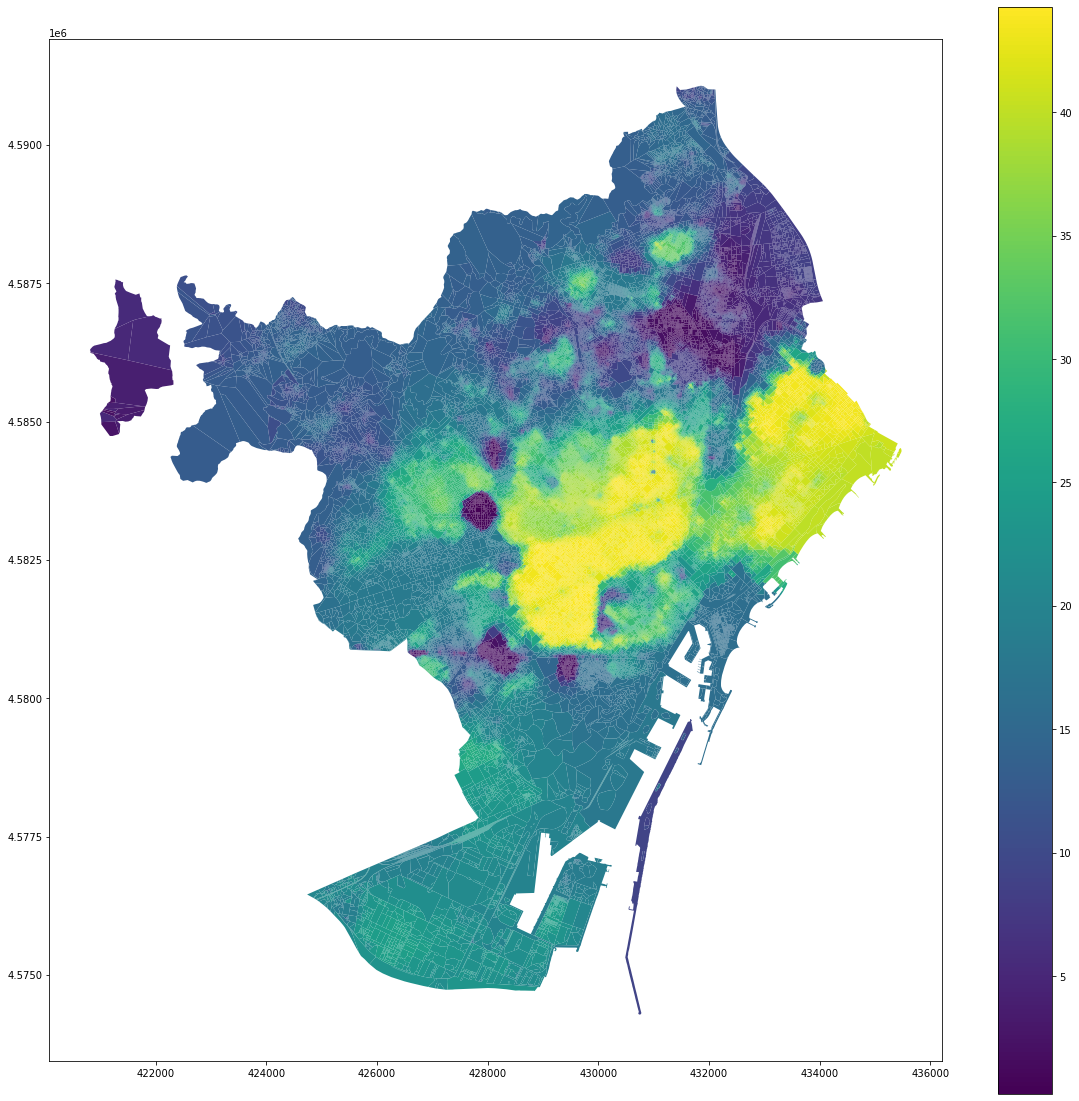

In [13]:
ax = gdf.plot(exploded['stcOri_q1'], figsize=(20, 20), legend=True)

<AxesSubplot:>

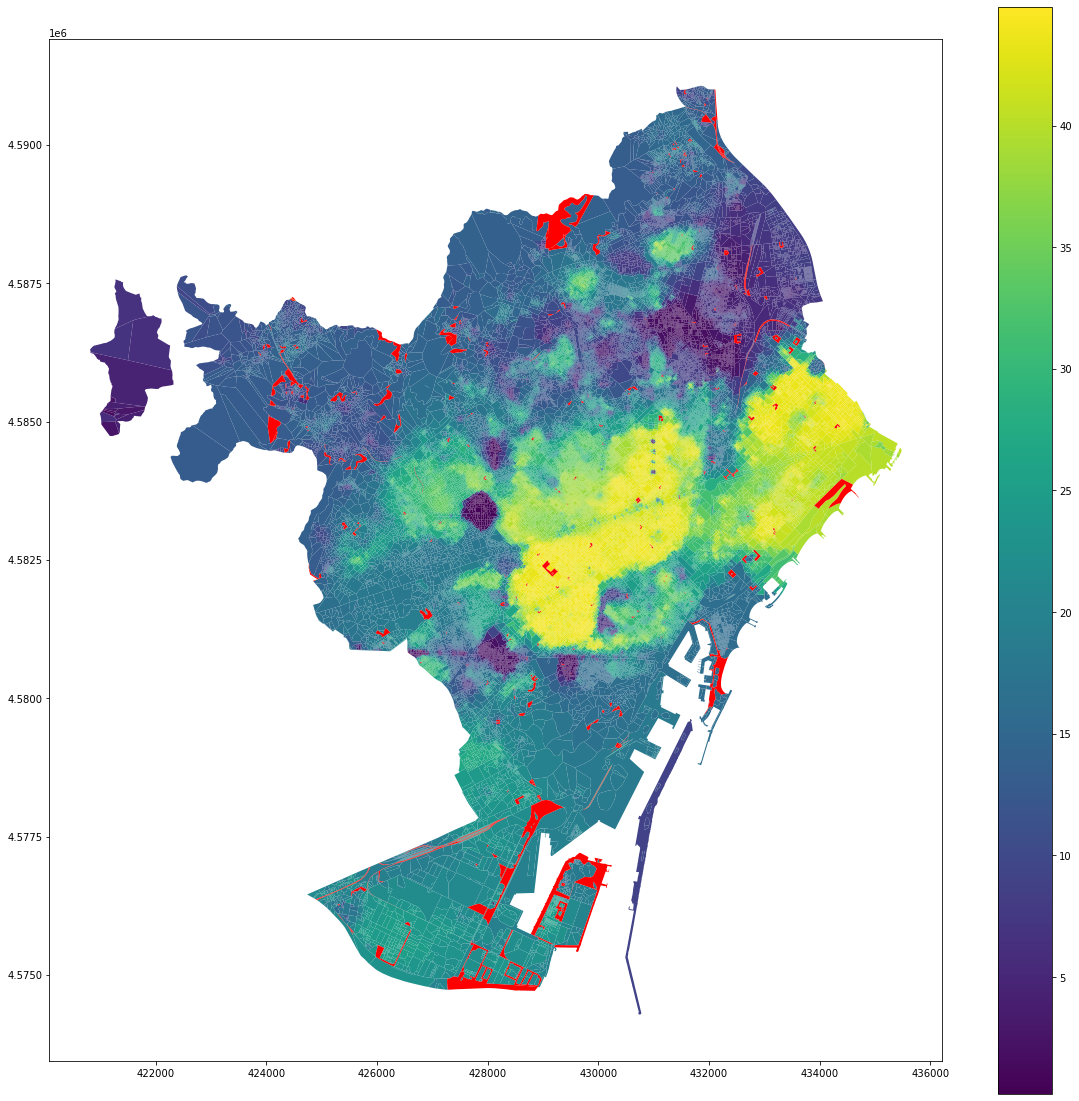

In [71]:
# centroid to polygon
ax = gdf.plot(exploded['stcOri_q1'], figsize=(20, 20), legend=True)
gdf[exploded['stcOri_q1'].isna()].plot(ax=ax, color='r', figsize=(20, 20), legend=True)

In [64]:
orig_conv = pd.read_parquet("../../urbangrammar_samba/sp_sig_concept/barcelona/convolutions.pq")

<AxesSubplot:>

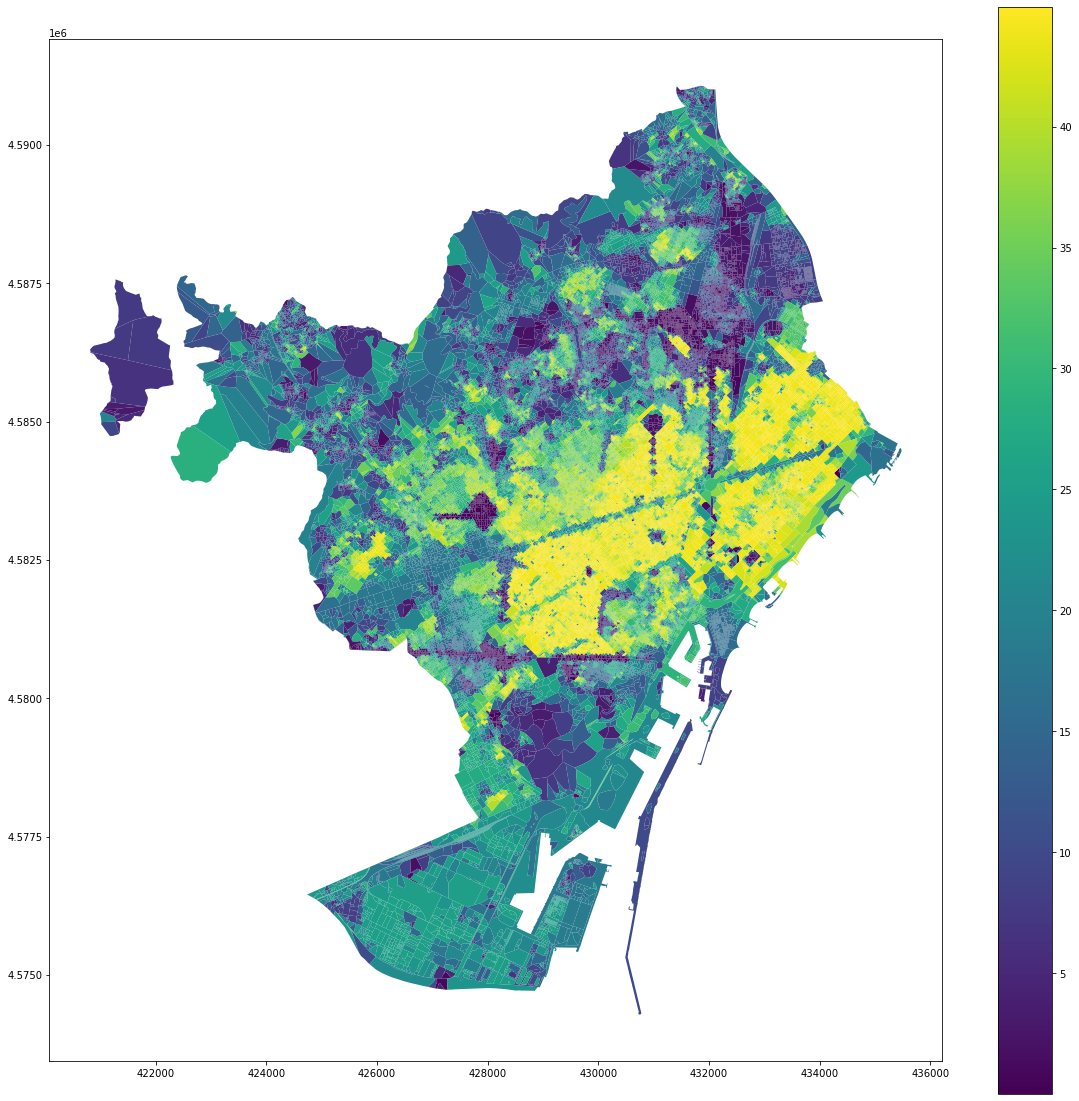

In [65]:
gdf.plot(orig_conv['stcOri_q1'], figsize=(20, 20), legend=True)

In [66]:
conv3 = pd.read_parquet("../../urbangrammar_samba/sp_sig_concept/barcelona/convolutions_q3.pq")

<AxesSubplot:>

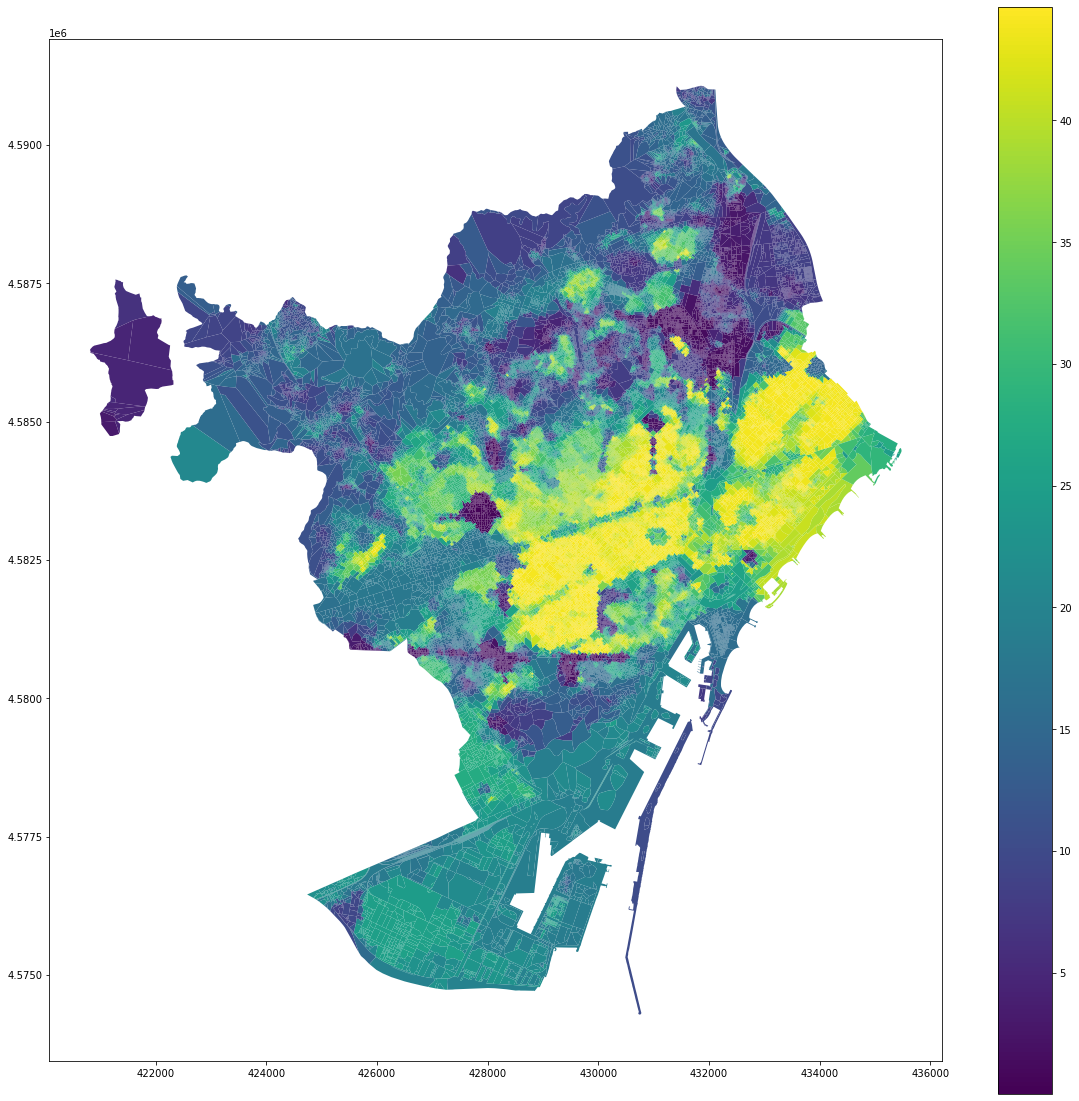

In [67]:
gdf.plot(conv3['stcOri_q1'], figsize=(20, 20), legend=True)

In [68]:
conv10 = pd.read_parquet("../../urbangrammar_samba/sp_sig_concept/barcelona/convolutions_q10.pq")

<AxesSubplot:>

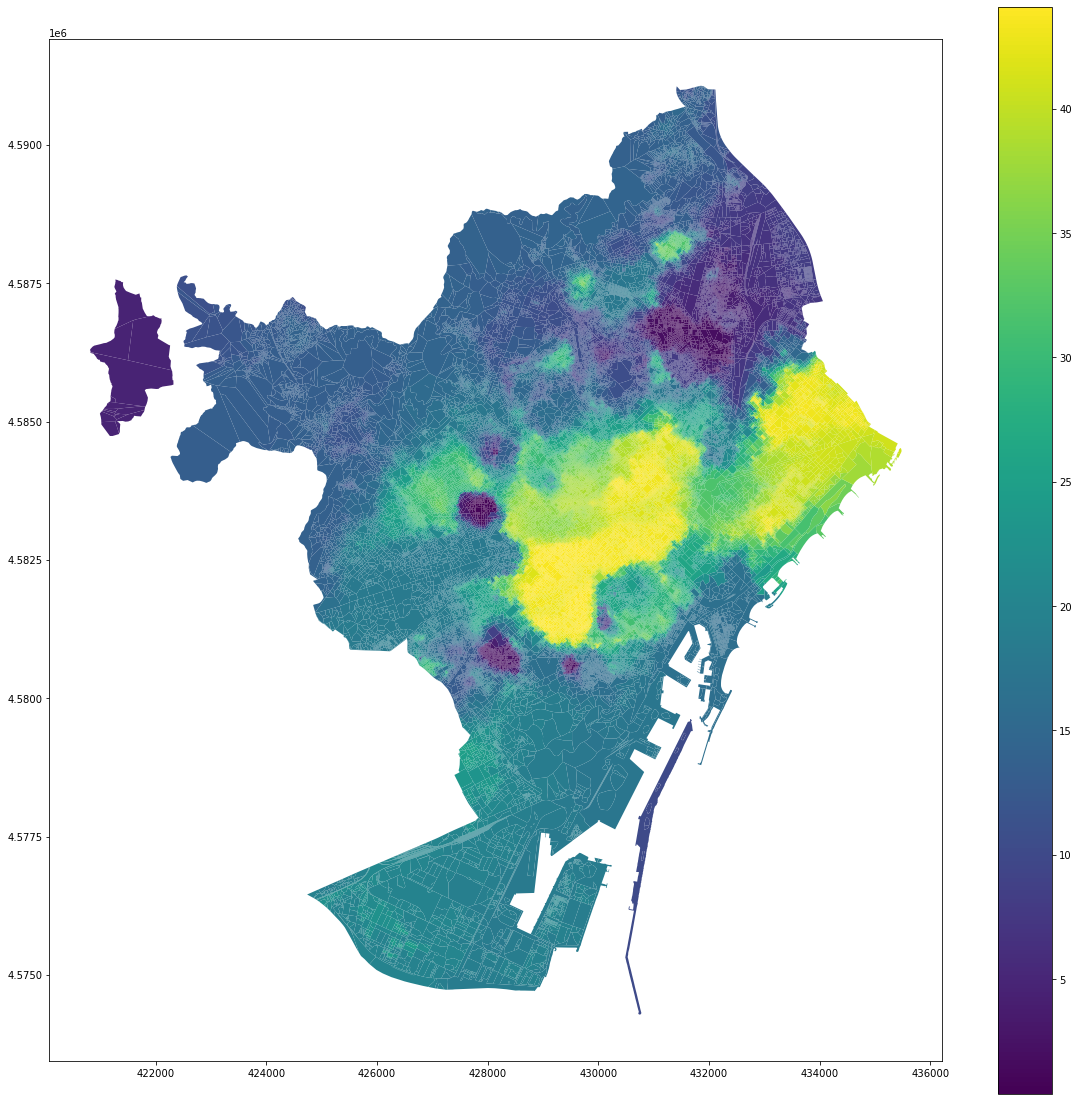

In [69]:
gdf.plot(conv10['stcOri_q1'], figsize=(20, 20), legend=True)